# Chapter 2 - Linear Models: Least Squares Theory

In [1]:
import warnings

import pandas as pd
import proplot as plot
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy import stats

warnings.filterwarnings("ignore")
%pylab inline


plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

Populating the interactive namespace from numpy and matplotlib


In [2]:
scots_races_df = pd.read_csv("../data/ScotsRaces.tsv.gz", sep="\t")
scots_races_df.head()

,race,distance,climb,time
1,GreenmantleNewYearDash,2.5,0.65,16.08
2,Carnethy5HillRace,6.0,2.50,48.35
3,CraigDunainHillRace,6.0,0.90,33.65
4,BenRhaHillRace,7.5,0.80,45.60
5,BenLomondHillRace,8.0,3.07,62.27


A dataset contains a list of hill races in Scotland for the year. Explanatory variables:
- distance of the race (in miles)
- the cumulative climb (in thousands of feet)

In [3]:
print(scots_races_df[["time", "climb", "distance"]].mean(axis=0))
print(scots_races_df[["time", "climb", "distance"]].std(axis=0))

time        56.089714
climb        1.815314
distance     7.528571
dtype: float64
time        50.392617
climb        1.619151
distance     5.523936
dtype: float64


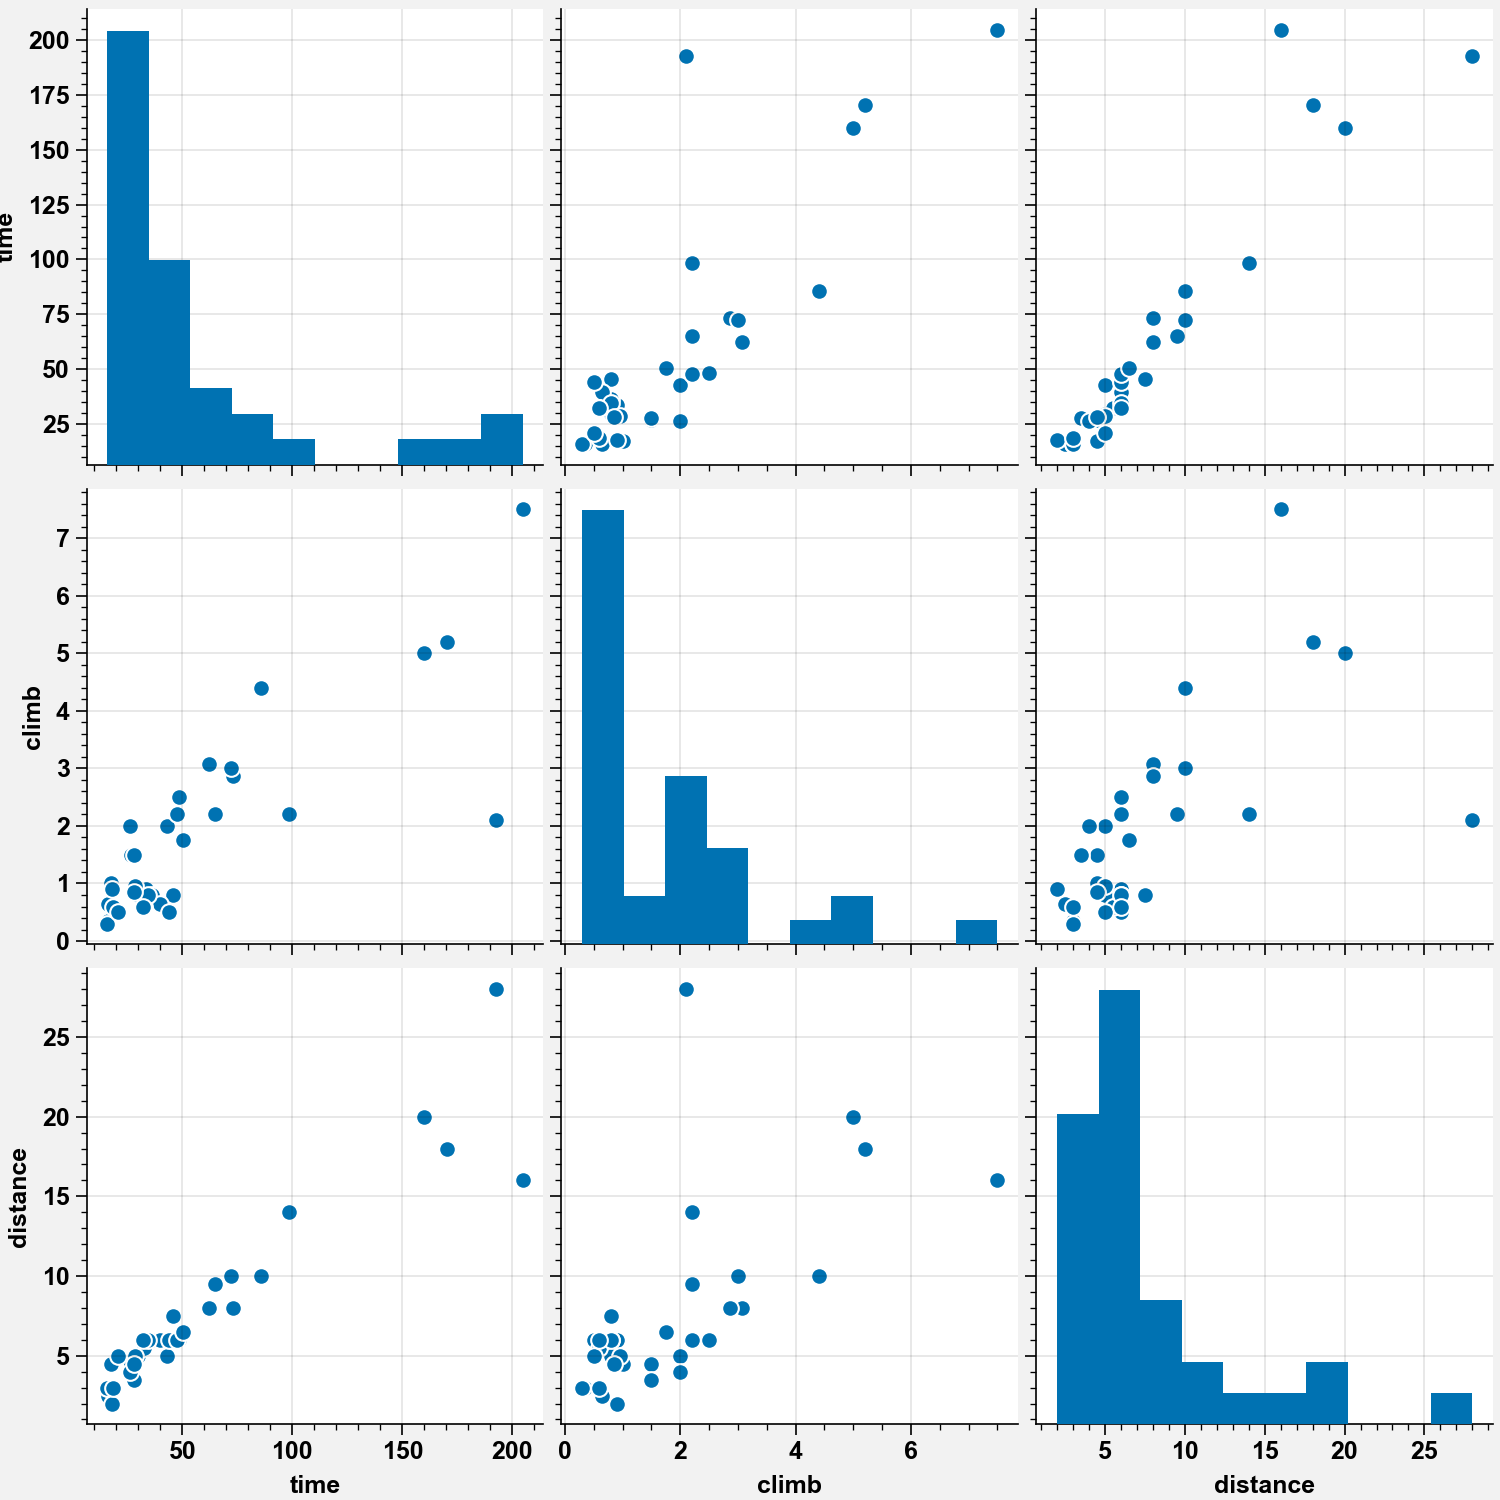

In [4]:
sns.pairplot(scots_races_df[["time", "climb", "distance"]])

In [5]:
scots_races_df[["climb", "distance", "time"]].corr()

,climb,distance,time
climb,1.000000,0.652346,0.832654
distance,0.652346,1.000000,0.943094
time,0.832654,0.943094,1.000000


In [6]:
fit_cd = smf.ols(
    formula="""time ~ climb + distance""",
    data=scots_races_df[["climb", "distance", "time"]],
).fit()
print(fit_cd.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     549.9
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.67e-25
Time:                        00:52:18   Log-Likelihood:                -123.95
No. Observations:                  35   AIC:                             253.9
Df Residuals:                      32   BIC:                             258.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.1086      2.561     -5.119      0.0

Thus, adjusted for climb, the predicted record time increased by 6.34 minutes for every additional midle of distance

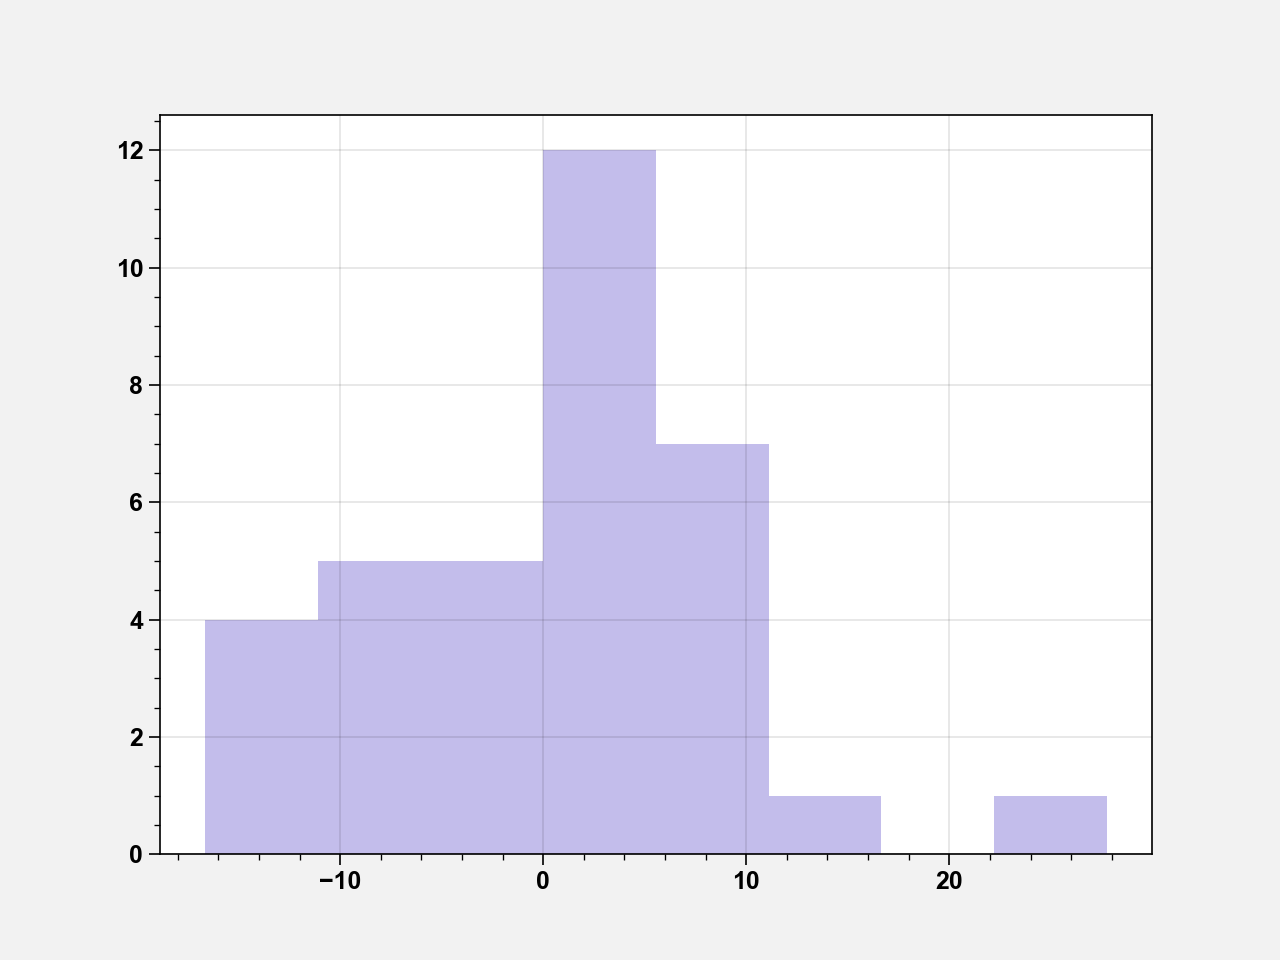

In [7]:
sns.distplot(fit_cd.resid, kde=False, color="slateblue")

In [8]:
pd.Series(fit_cd.resid_pearson).quantile(q=[0, 0.25, 0.5, 0.75, 1])

0.00   -1.906667
0.25   -0.554349
0.50    0.127085
0.75    0.534341
1.00    3.178498
dtype: float64

In [10]:
print(stats.pearsonr(fit_cd.fittedvalues, fit_cd.resid))

(-2.4424906541753444e-15, 0.99999999999999)


In [11]:
print(fit_cd.resid_pearson.mean(), fit_cd.resid_pearson.std())

4.4345479669313396e-15 0.956182887467515


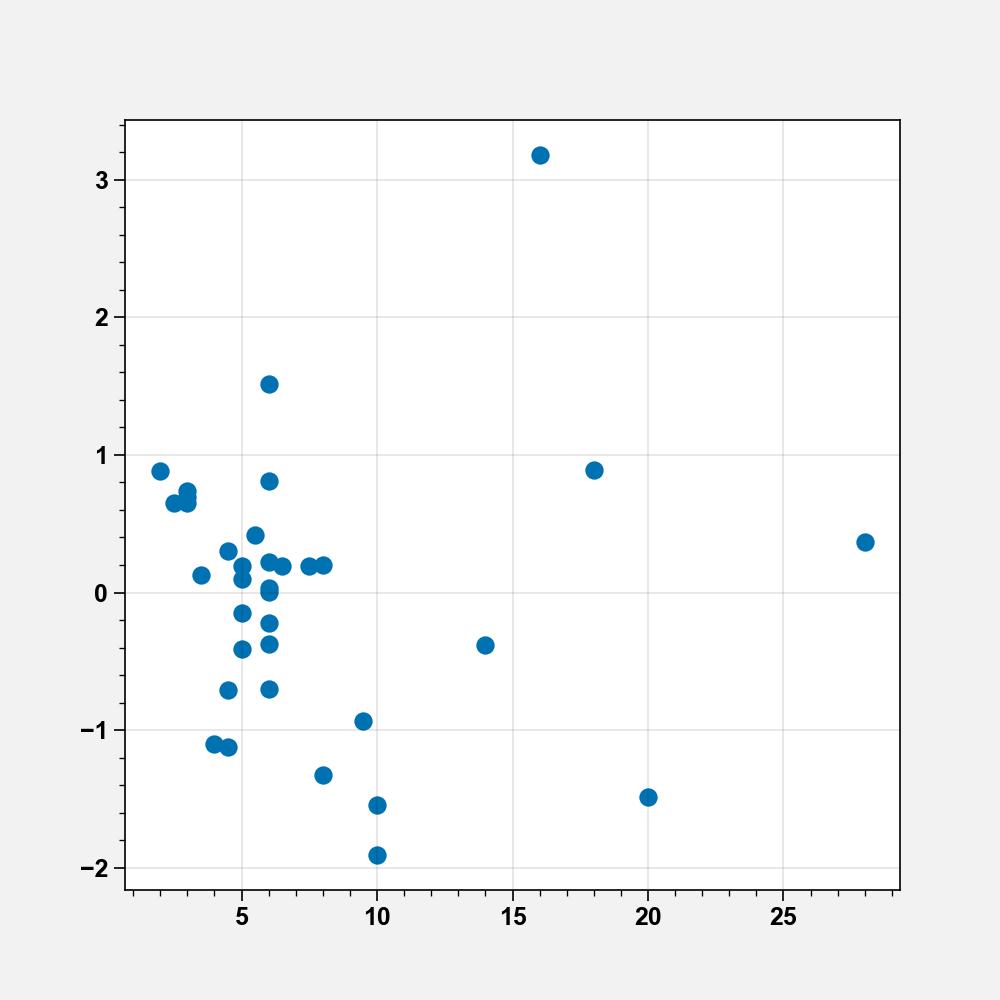

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(scots_races_df["distance"], fit_cd.resid_pearson)

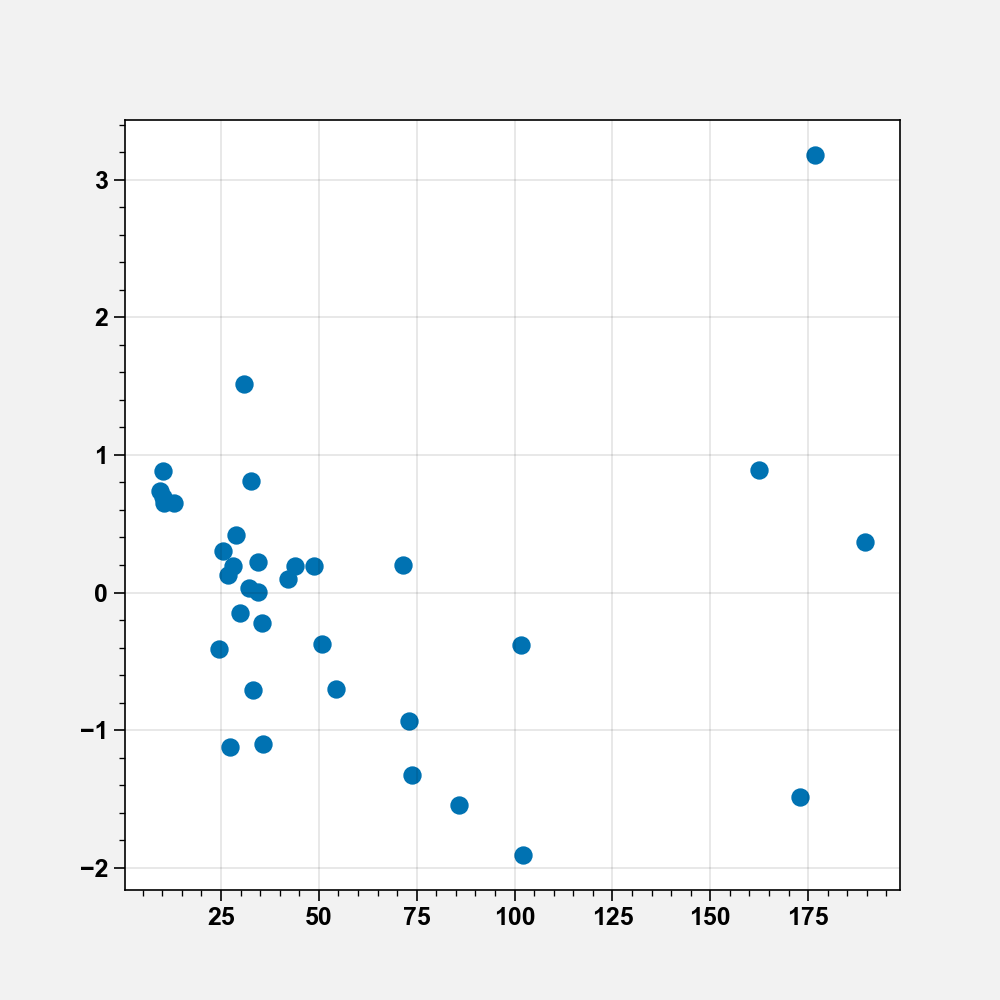

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(fit_cd.fittedvalues, fit_cd.resid_pearson)

Text(0, 0.5, "Cook's distance")

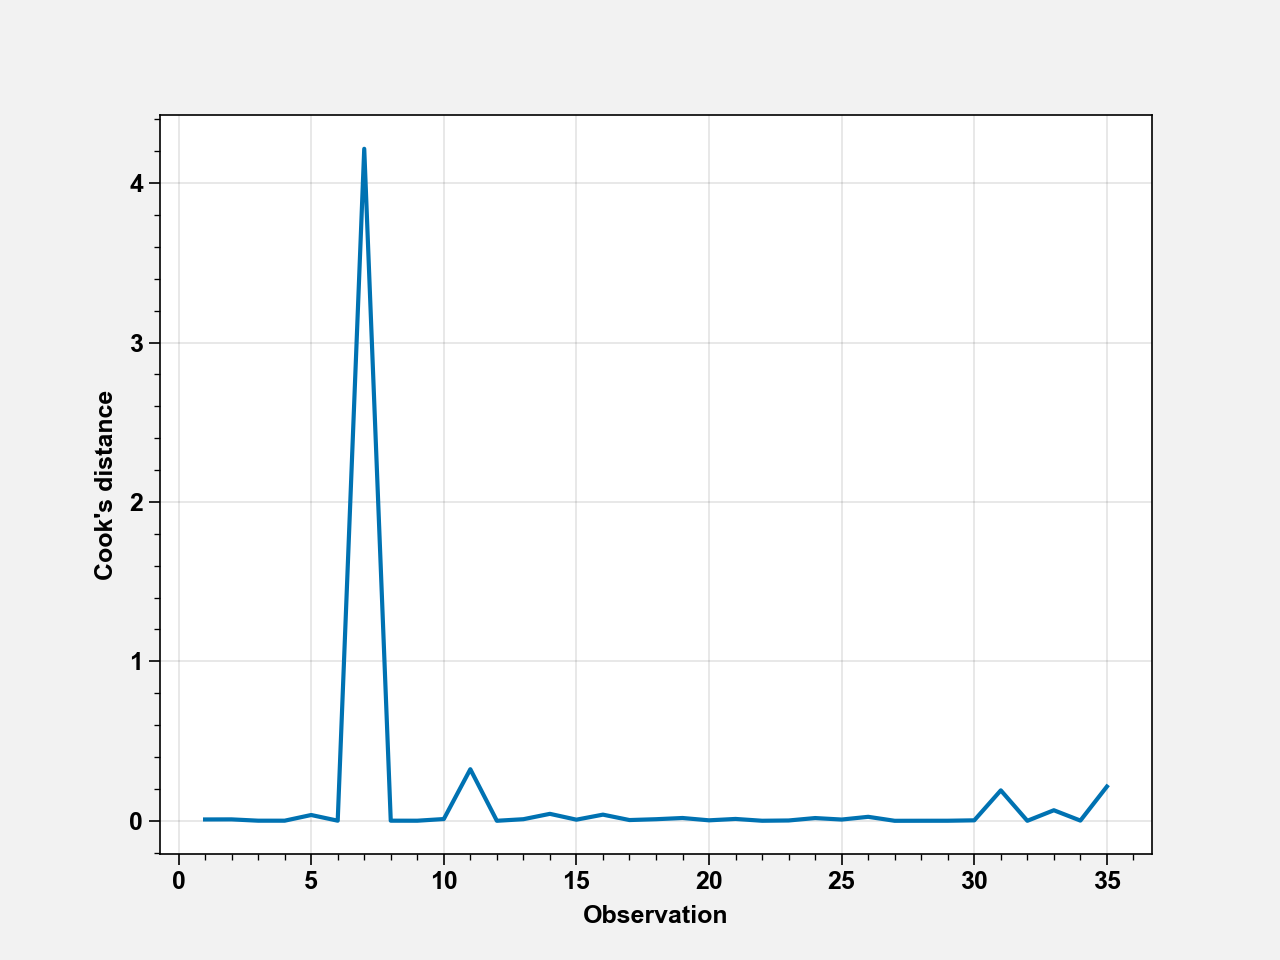

In [14]:
influence = fit_cd.get_influence()
summary_frame = influence.summary_frame()
fig, ax = plt.subplots()
ax.plot(summary_frame["cooks_d"])
ax.set_xlabel("Observation")
ax.set_ylabel("Cook's distance")

# ANOVA

In [15]:
lm = smf.ols(
    formula="""time ~ climb + distance""",
    data=scots_races_df[["climb", "distance", "time"]],
).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq    df           F        PR(>F)
climb      7105.618848   1.0   93.139930  5.368815e-11
distance  24038.225642   1.0  315.091296  3.990140e-18
Residual   2441.270928  32.0         NaN           NaN


In [16]:
# Change order
lm = smf.ols(
    formula="""time ~ distance + climb""",
    data=scots_races_df[["climb", "distance", "time"]],
).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq    df           F        PR(>F)
distance  24038.225642   1.0  315.091296  3.990140e-18
climb      7105.618848   1.0   93.139930  5.368815e-11
Residual   2441.270928  32.0         NaN           NaN


In [17]:
lm = smf.ols(
    formula="""time ~ climb + distance + climb:distance """,
    data=scots_races_df[["climb", "distance", "time"]],
).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     524.1
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.24e-26
Time:                        00:52:45   Log-Likelihood:                -117.30
No. Observations:                  35   AIC:                             242.6
Df Residuals:                      31   BIC:                             248.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7672      3.906     -0.